To validate Module 2 and correctly answer the questions will require that you perform the following exercise first: take the code in the file named module2.R, and modify it such that the managerial segment "new active" is divided into two sub-segments called "new active high" (with an average purchase amount of $100 or more) and "new active low" (with an average purchase amount of less than $100). Tips: make sure that you apply that modification to both the 2015 and 2014 segmentations, and that you modify accordingly the code that re-order the factor "segment".

You'll be asked to answer these questions :

How many "new active low" customers were there in 2015?

The number of "new active high" customers has increased between 2014 and 2015. What is the rate of that increase?

Regarding the customers who belonged to the "new warm" segment in 2014, what was there expected revenue, all things considered, in 2015?

In terms of expected revenue, which segment groups the least profitable customers?

Looking at segment description, what is the average purchase amount of a customer who belongs to the "new active high" segment?

## Exporlatory Analysis

In [1]:
# Load text file into local variable called 'data'
data = read.delim(file = 'D:/Data/purchases.txt', header = FALSE, sep = '\t', dec = '.')

In [2]:
# Add headers and interpret the last column as a date, extract year of purchase
colnames(data) = c('customer_id', 'purchase_amount', 'date_of_purchase')
data$date_of_purchase = as.Date(data$date_of_purchase, "%Y-%m-%d")
data$year_of_purchase = as.numeric(format(data$date_of_purchase, "%Y"))
data$days_since       = as.numeric(difftime(time1 = "2016-01-01",
                                            time2 = data$date_of_purchase,
                                            units = "days"))

In [3]:
# Display the data after transformation
head(data)
summary(data)

,customer_id,purchase_amount,date_of_purchase,year_of_purchase,days_since
1,760,25,2009-11-06,2009,2247.25
2,860,50,2012-09-28,2012,1190.25
3,1200,100,2005-10-25,2005,3720.25
4,1420,50,2009-07-09,2009,2367.25
5,1940,70,2013-01-25,2013,1071.25
6,1960,40,2013-10-29,2013,794.25


  customer_id     purchase_amount   date_of_purchase     year_of_purchase
 Min.   :    10   Min.   :   5.00   Min.   :2005-01-02   Min.   :2005    
 1st Qu.: 57720   1st Qu.:  25.00   1st Qu.:2009-01-17   1st Qu.:2009    
 Median :102440   Median :  30.00   Median :2011-11-23   Median :2011    
 Mean   :108935   Mean   :  62.34   Mean   :2011-07-14   Mean   :2011    
 3rd Qu.:160525   3rd Qu.:  60.00   3rd Qu.:2013-12-29   3rd Qu.:2013    
 Max.   :264200   Max.   :4500.00   Max.   :2015-12-31   Max.   :2015    
   days_since     
 Min.   :   1.25  
 1st Qu.: 733.25  
 Median :1500.25  
 Mean   :1632.19  
 3rd Qu.:2540.25  
 Max.   :4016.25  

## Compute key marketing indicators using SQL language

In [4]:
library(sqldf)

Warning message:
: package 'sqldf' was built under R version 3.2.2Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite
Loading required package: DBI


In [5]:
# Compute recency, frequency, and average purchase amount
customers_2015 = sqldf("SELECT customer_id,
                               MIN(days_since) AS 'recency',
                               MAX(days_since) AS 'first_purchase',
                               COUNT(*) AS 'frequency',
                               AVG(purchase_amount) AS 'amount'
                        FROM data GROUP BY 1")

Loading required package: tcltk


### Explore the Data

In [6]:
# Explore the data
head(customers_2015)
summary(customers_2015)

,customer_id,recency,first_purchase,frequency,amount
1,10,3829.25,3829.25,1,30
2,80,343.25,3751.25,7,71.42857
3,90,758.25,3783.25,10,115.8
4,120,1401.25,1401.25,1,20
5,130,2970.25,3710.25,2,50
6,160,2963.25,3577.25,2,30


  customer_id        recency        first_purchase      frequency     
 Min.   :    10   Min.   :   1.25   Min.   :   1.25   Min.   : 1.000  
 1st Qu.: 81990   1st Qu.: 244.25   1st Qu.: 988.25   1st Qu.: 1.000  
 Median :136430   Median :1070.25   Median :2087.25   Median : 2.000  
 Mean   :137574   Mean   :1253.29   Mean   :1984.26   Mean   : 2.782  
 3rd Qu.:195100   3rd Qu.:2130.25   3rd Qu.:2992.25   3rd Qu.: 3.000  
 Max.   :264200   Max.   :4014.25   Max.   :4016.25   Max.   :45.000  
     amount       
 Min.   :   5.00  
 1st Qu.:  21.67  
 Median :  30.00  
 Mean   :  57.79  
 3rd Qu.:  50.00  
 Max.   :4500.00  

### Histograms

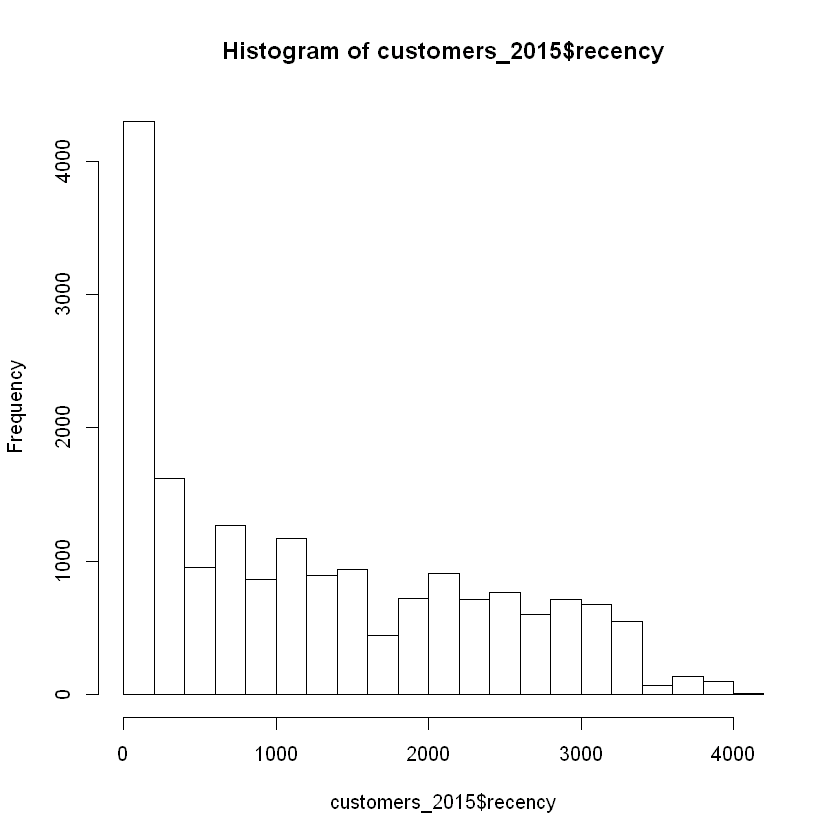

In [7]:
hist(customers_2015$recency)

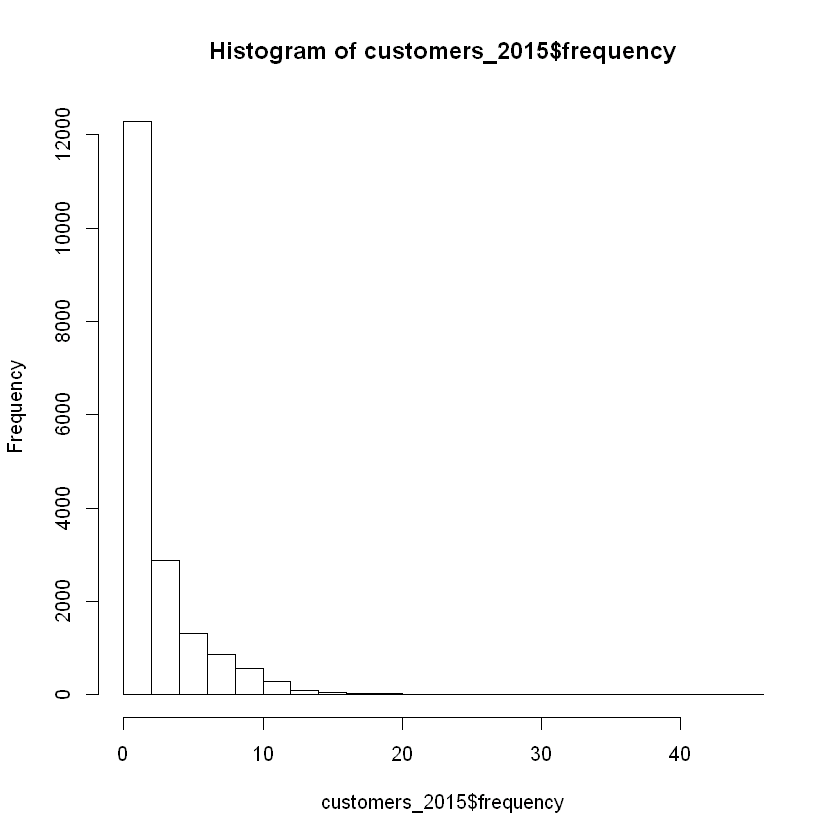

In [8]:
hist(customers_2015$frequency)

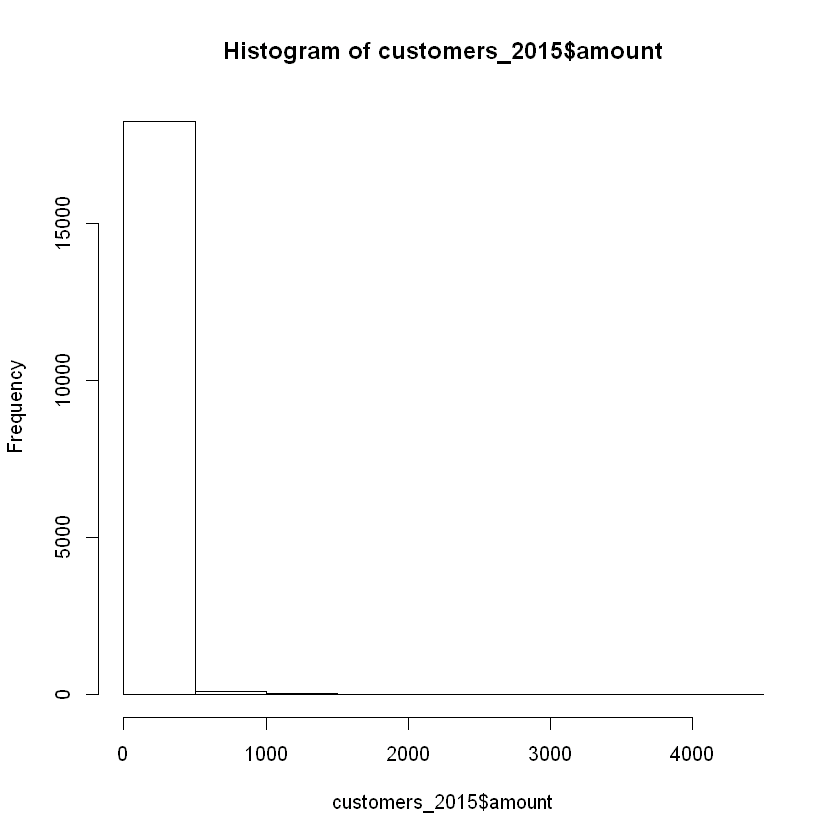

In [9]:
hist(customers_2015$amount)


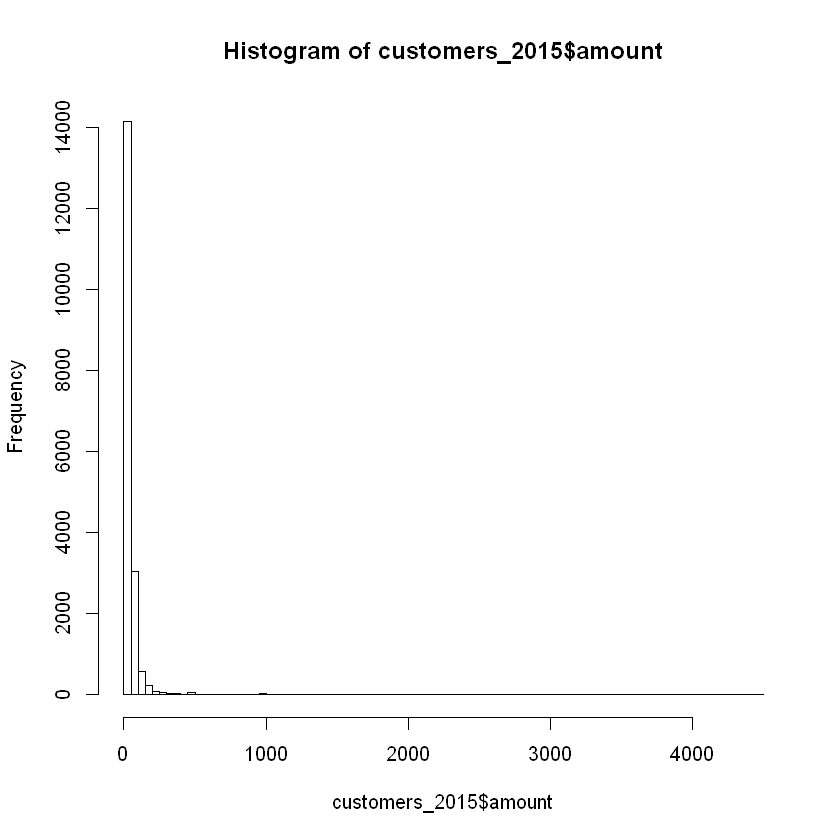

In [10]:
hist(customers_2015$amount, breaks = 100)

## Prepare Data for Segmentation

In [11]:
# Simple 2-segment solution based on recency alone
customers_2015$segment = ifelse(test = customers_2015$recency > 365*3, yes = "inactive", no = "NA")
table(customers_2015$segment)
aggregate(x = customers_2015[, 2:5], by = list(customers_2015$segment), mean)


inactive       NA 
    9158     9259 

,Group.1,recency,first_purchase,frequency,amount
1,inactive,2178.361,2546.418,1.814479,48.11277
2,NA,338.3059,1428.234,3.739713,67.3676


In [12]:
# A more complex 3-segment solution based on recency alone
customers_2015$segment = ifelse(test = customers_2015$recency > 365*3,
                           yes = "inactive",
                           no = ifelse(test = customers_2015$recency > 365*2,
                                       yes = "cold",
                                       no = "NA"))
table(customers_2015$segment)
aggregate(x = customers_2015[, 2:5], by = list(customers_2015$segment), mean)


    cold inactive       NA 
    1903     9158     7356 

,Group.1,recency,first_purchase,frequency,amount
1,cold,858.0314,1432.367,2.303205,51.73989
2,inactive,2178.361,2546.418,1.814479,48.11277
3,NA,203.8528,1427.164,4.111338,71.4105


In [13]:
# Simple 2-segment solution using the which statement
customers_2015$segment = "NA"
customers_2015$segment[which(customers_2015$recency > 365*3)] = "inactive"
table(customers_2015$segment)
aggregate(x = customers_2015[, 2:5], by = list(customers_2015$segment), mean)


inactive       NA 
    9158     9259 

,Group.1,recency,first_purchase,frequency,amount
1,inactive,2178.361,2546.418,1.814479,48.11277
2,NA,338.3059,1428.234,3.739713,67.3676


In [14]:
# More complex 4-segment solution using which
customers_2015$segment = "NA"
customers_2015$segment[which(customers_2015$recency > 365*3)] = "inactive"
customers_2015$segment[which(customers_2015$recency <= 365*3 & customers_2015$recency > 365*2)] = "cold"
customers_2015$segment[which(customers_2015$recency <= 365*2 & customers_2015$recency > 365*1)] = "warm"
customers_2015$segment[which(customers_2015$recency <= 365)] = "active"
table(customers_2015$segment)
aggregate(x = customers_2015[, 2:5], by = list(customers_2015$segment), mean)


  active     cold inactive     warm 
    5398     1903     9158     1958 

,Group.1,recency,first_purchase,frequency,amount
1,active,99.99064,1466.093,4.560763,72.08094
2,cold,858.0314,1432.367,2.303205,51.73989
3,inactive,2178.361,2546.418,1.814479,48.11277
4,warm,490.1897,1319.84,2.872319,69.56215


In [34]:
# Complete segment solution using which, and exploiting previous test as input
customers_2015$segment = "NA"
customers_2015$segment[which(customers_2015$recency > 365*3)] = "inactive"
customers_2015$segment[which(customers_2015$recency <= 365*3 & customers_2015$recency > 365*2)] = "cold"
customers_2015$segment[which(customers_2015$recency <= 365*2 & customers_2015$recency > 365*1)] = "warm"
customers_2015$segment[which(customers_2015$recency <= 365)] = "active"
customers_2015$segment[which(customers_2015$segment == "warm" & customers_2015$first_purchase <= 365*2)] = "new warm"
customers_2015$segment[which(customers_2015$segment == "warm" & customers_2015$amount < 100)] = "warm low value"
customers_2015$segment[which(customers_2015$segment == "warm" & customers_2015$amount >= 100)] = "warm high value"
customers_2015$segment[which(customers_2015$segment == "active" & customers_2015$first_purchase <= 365)] = "new active"
customers_2015$segment[which(customers_2015$segment == "active" & customers_2015$amount < 100)] = "active low value"
customers_2015$segment[which(customers_2015$segment == "active" & customers_2015$amount >= 100)] = "active high value"
customers_2015$segment[which(customers_2015$segment == "new active" & customers_2015$amount >= 100)] = "new active high"
customers_2015$segment[which(customers_2015$segment == "new active" & customers_2015$amount < 100)] = "new active low"

table(customers_2015$segment)
aggregate(x = customers_2015[, 2:5], by = list(customers_2015$segment), mean)


active high value  active low value              cold          inactive 
              573              3313              1903              9158 
  new active high    new active low          new warm   warm high value 
              263              1249               938               119 
   warm low value 
              901 

,Group.1,recency,first_purchase,frequency,amount
1,active high value,89.07024,1986.159,5.888307,240.0457
2,active low value,108.611,2004.052,5.935406,40.72452
3,cold,858.0314,1432.367,2.303205,51.73989
4,inactive,2178.361,2546.418,1.814479,48.11277
5,new active high,82.62262,84.38688,1.015209,283.381
6,new active low,85.79203,91.5014,1.052042,33.7047
7,new warm,509.5549,516.8726,1.044776,66.59903
8,warm high value,455.3761,2015.603,4.714286,327.4075
9,warm low value,474.6274,2063.889,4.531632,38.59193


In [36]:
# Re-order factor in a way that makes sense
customers_2015$segment = factor(x = customers_2015$segment, levels = c("inactive", "cold",
                                                             "warm high value", "warm low value", "new warm",
                                                             "active high value", "active low value", 
                                                              "new active high", "new active low"))
table(customers_2015$segment)
aggregate(x = customers_2015[, 2:5], by = list(customers_2015$segment), mean)


         inactive              cold   warm high value    warm low value 
             9158              1903               119               901 
         new warm active high value  active low value   new active high 
              938               573              3313               263 
   new active low 
             1249 

,Group.1,recency,first_purchase,frequency,amount
1,inactive,2178.361,2546.418,1.814479,48.11277
2,cold,858.0314,1432.367,2.303205,51.73989
3,warm high value,455.3761,2015.603,4.714286,327.4075
4,warm low value,474.6274,2063.889,4.531632,38.59193
5,new warm,509.5549,516.8726,1.044776,66.59903
6,active high value,89.07024,1986.159,5.888307,240.0457
7,active low value,108.611,2004.052,5.935406,40.72452
8,new active high,82.62262,84.38688,1.015209,283.381
9,new active low,85.79203,91.5014,1.052042,33.7047


### SEGMENTING A DATABASE RETROSPECTIVELY 

This ignores customers who did not exist at that point in time.  In this examle, customers over the last year.

In [37]:
# Compute recency, frequency, and average purchase amount
customers_2014 = sqldf("SELECT customer_id,
                               MIN(days_since) - 365 AS 'recency',
                               MAX(days_since) - 365 AS 'first_purchase',
                               COUNT(*) AS 'frequency',
                               AVG(purchase_amount) AS 'amount'
                        FROM data
                        WHERE days_since > 365
                        GROUP BY 1")

In [38]:
# Complete segment solution using which, and exploiting previous test as input
customers_2014$segment = "NA"
customers_2014$segment[which(customers_2014$recency > 365*3)] = "inactive"
customers_2014$segment[which(customers_2014$recency <= 365*3 & customers_2014$recency > 365*2)] = "cold"
customers_2014$segment[which(customers_2014$recency <= 365*2 & customers_2014$recency > 365*1)] = "warm"
customers_2014$segment[which(customers_2014$recency <= 365)] = "active"
customers_2014$segment[which(customers_2014$segment == "warm" & customers_2014$first_purchase <= 365*2)] = "new warm"
customers_2014$segment[which(customers_2014$segment == "warm" & customers_2014$amount < 100)] = "warm low value"
customers_2014$segment[which(customers_2014$segment == "warm" & customers_2014$amount >= 100)] = "warm high value"
customers_2014$segment[which(customers_2014$segment == "active" & customers_2014$first_purchase <= 365)] = "new active"
customers_2014$segment[which(customers_2014$segment == "active" & customers_2014$amount < 100)] = "active low value"
customers_2014$segment[which(customers_2014$segment == "active" & customers_2014$amount >= 100)] = "active high value"
customers_2014$segment[which(customers_2014$segment == "new active" & customers_2014$amount >= 100)] = "new active high"
customers_2014$segment[which(customers_2014$segment == "new active" & customers_2014$amount < 100)] = "new active low"


In [39]:
# Re-order factor in a way that makes sense
customers_2014$segment = factor(x = customers_2014$segment, levels = c("inactive", "cold",
                                                                       "warm high value", "warm low value", "new warm",
                                                                       "active high value", "active low value", 
                                                                       "new active high", "new active low"))

In [40]:
# Show segmentation results
table(customers_2014$segment)
#pie(table(customers_2014$segment), col = rainbow(24))
aggregate(x = customers_2014[, 2:5], by = list(customers_2014$segment), mean)


         inactive              cold   warm high value    warm low value 
             7512              2153               111               956 
         new warm active high value  active low value   new active high 
             1250               475              3011               203 
   new active low 
             1234 

,Group.1,recency,first_purchase,frequency,amount
1,inactive,2058.691,2353.287,1.730964,48.1112
2,cold,866.8668,1565.694,2.254064,51.1146
3,warm high value,461.4482,1879.061,4.414414,187.8491
4,warm low value,470.9111,1945.677,4.361925,37.38206
5,new warm,497.5676,505.13,1.0576,51.36765
6,active high value,85.58895,1838.301,5.696842,261.9022
7,active low value,98.341,1796.601,5.633677,40.45917
8,new active high,94.86576,103.2155,1.049261,284.6735
9,new active low,138.5012,149.686,1.074554,34.36494


### COMPUTING REVENUE GENERATION PER SEGMENT

In [21]:
# Compute how much revenue is generated by segments
# Notice that people with no revenue in 2015 do NOT appear
revenue_2015 = sqldf("SELECT customer_id, SUM(purchase_amount) AS 'revenue_2015'
                      FROM data
                      WHERE year_of_purchase = 2015
                      GROUP BY 1")
summary(revenue_2015)

  customer_id      revenue_2015    
 Min.   :    80   Min.   :   5.00  
 1st Qu.:104105   1st Qu.:  30.00  
 Median :185495   Median :  50.00  
 Mean   :167782   Mean   :  88.62  
 3rd Qu.:246058   3rd Qu.:  85.00  
 Max.   :264200   Max.   :4500.00  

In [22]:
# Merge 2015 customers and 2015 revenue (correct way to merge all observations)
actual = merge(customers_2015, revenue_2015, all.x = TRUE)
actual$revenue_2015[is.na(actual$revenue_2015)] = 0

In [23]:
# Show average revenue per customer and per segment
aggregate(x = actual$revenue_2015, by = list(customers_2015$segment), mean)

,Group.1,x
1,inactive,0
2,cold,0
3,warm high value,0
4,warm low value,0
5,new warm,0
6,active high value,323.5689
7,active low value,52.30604


In [24]:
# Merge 2014 customers and 2015 revenue (correct way using all observations)
forward = merge(customers_2014, revenue_2015, all.x = TRUE)
forward$revenue_2015[is.na(forward$revenue_2015)] = 0

In [25]:
# Show average revenue per customer and per segment
r = aggregate(x = forward$revenue_2015, by = list(customers_2014$segment), mean)
print(r)

            Group.1          x
1          inactive   2.949466
2              cold   6.108221
3   warm high value 114.459459
4    warm low value  13.494770
5          new warm   5.064000
6 active high value 254.077895
7  active low value  41.896556


X above shows how much a 2014 customer generated in 2015 (by category)

            Group.1          x
6 active high value 254.077895
3   warm high value 114.459459
7  active low value  41.896556
4    warm low value  13.494770
2              cold   6.108221
5          new warm   5.064000
1          inactive   2.949466


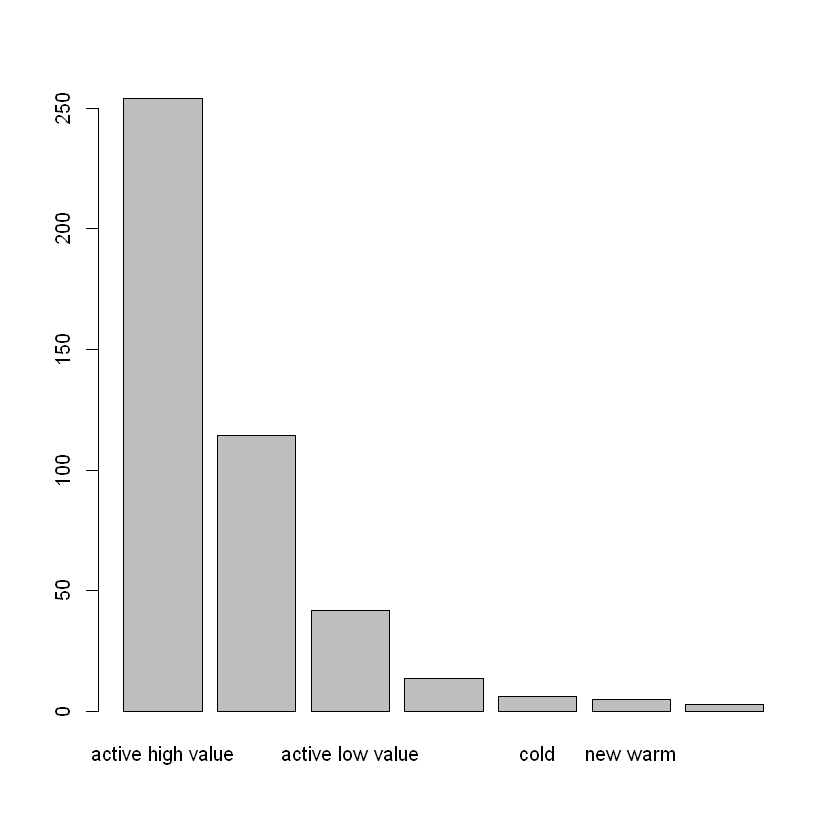

In [26]:
# Re-order and display results
r = r[order(r$x, decreasing = TRUE), ]
print(r)
barplot(r$x, names.arg = r$Group.1)